In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

#import custom modules
import prep.prep_data as prep
import prep.prep_cv as cv

In [2]:
df = prep.read_then_clean('C:/Users/13706/OneDrive - UW/Desktop/583/project/housing_data.csv',
                          ['housing_roof', 'housing_wall', 'housing_floor'],
                          ['MACRO_DHS'])

~begin reading
data read!
~begin cleaning
data clean!
~applying filter


In [3]:
df_clean = prep.remove_garbage_codes(df, 
                                     ['housing_roof', 'housing_wall', 'housing_floor'],
                                     ['nan', 'other', 'not a dejure resident', 'not dejure resident'])

{'nan': nan, 'other': nan, 'not a dejure resident': nan, 'not dejure resident': nan}
removing garbage from  housing_roof
removing garbage from  housing_wall
removing garbage from  housing_floor


In [4]:
df_clean = prep.extract_ranking(df_clean, ['housing_roof_num', 'housing_wall_num', 'housing_floor_num'])

defining ranking for  housing_roof_num
defining ranking for  housing_wall_num
defining ranking for  housing_floor_num


In [5]:
df_clean = prep.remove_garbage_codes(df_clean, 
                                     ['housing_roof_rank', 'housing_wall_rank', 'housing_floor_rank'],
                                     ['4', '5', '6', '7', '8', '9', 'n'])

{'4': nan, '5': nan, '6': nan, '7': nan, '8': nan, '9': nan, 'n': nan}
removing garbage from  housing_roof_rank
removing garbage from  housing_wall_rank
removing garbage from  housing_floor_rank


In [6]:
print(df_clean)

         Unnamed: 0 ihme_loc_id     nid survey_series   hhweight  urban  \
0                 1         AFG   56099     MACRO_DHS   695752.0    0.0   
1                 2         AFG   56099     MACRO_DHS   695752.0    0.0   
2                 3         AFG   56099     MACRO_DHS  1075029.0    0.0   
3                 4         AFG   56099     MACRO_DHS   897294.0    0.0   
4                 5         AFG   56099     MACRO_DHS   695752.0    0.0   
5                 6         AFG   56099     MACRO_DHS   695752.0    0.0   
6                 7         AFG   56099     MACRO_DHS  1039732.0    0.0   
7                 8         AFG   56099     MACRO_DHS   695752.0    0.0   
8                 9         AFG   56099     MACRO_DHS  1209277.0    0.0   
9                10         AFG   56099     MACRO_DHS  1209277.0    0.0   
10               11         AFG   56099     MACRO_DHS  1725455.0    0.0   
11               12         AFG   56099     MACRO_DHS  1209277.0    0.0   
12               13      

In [7]:
df_clean.dtypes

Unnamed: 0              int64
ihme_loc_id            object
nid                     int64
survey_series          object
hhweight              float64
urban                 float64
hh_size               float64
int_year                int64
housing_roof           object
housing_wall           object
housing_floor          object
housing_roof_num       object
housing_wall_num       object
housing_floor_num      object
iso3                   object
cluster_id              int64
index                   int64
region_id               int64
super_region_id         int64
N                     float64
housing_roof_rank      object
housing_wall_rank      object
housing_floor_rank     object
dtype: object

In [8]:
print(df)

         Unnamed: 0 ihme_loc_id     nid survey_series   hhweight  urban  \
0                 1         AFG   56099     MACRO_DHS   695752.0    0.0   
1                 2         AFG   56099     MACRO_DHS   695752.0    0.0   
2                 3         AFG   56099     MACRO_DHS  1075029.0    0.0   
3                 4         AFG   56099     MACRO_DHS   897294.0    0.0   
4                 5         AFG   56099     MACRO_DHS   695752.0    0.0   
5                 6         AFG   56099     MACRO_DHS   695752.0    0.0   
6                 7         AFG   56099     MACRO_DHS  1039732.0    0.0   
7                 8         AFG   56099     MACRO_DHS   695752.0    0.0   
8                 9         AFG   56099     MACRO_DHS  1209277.0    0.0   
9                10         AFG   56099     MACRO_DHS  1209277.0    0.0   
10               11         AFG   56099     MACRO_DHS  1725455.0    0.0   
11               12         AFG   56099     MACRO_DHS  1209277.0    0.0   
12               13      

In [9]:
#change the varibale type from object to float
df_clean['housing_roof_num'] = pd.to_numeric(df['housing_roof_num'].str.replace(' ', ' '),errors = 'force')
df_clean['housing_wall_num'] = pd.to_numeric(df['housing_wall_num'].str.replace(' ', ' '),errors = 'force')
df_clean['housing_floor_num'] = pd.to_numeric(df['housing_floor_num'].str.replace(' ', ' '),errors = 'force')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B94F1D278>]],
      dtype=object)

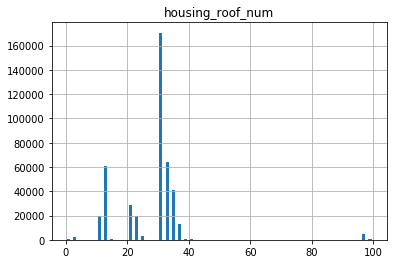

In [10]:
# the distribution of housing_roof_num
df_clean.hist(column = 'housing_roof_num', bins=50,rwidth=0.5, range=[0,100])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B94F1D240>]],
      dtype=object)

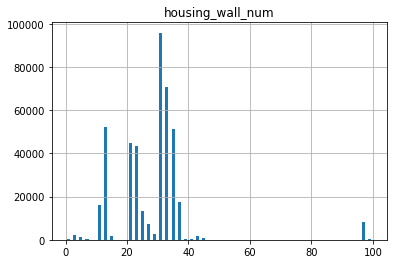

In [11]:
# the distribution of housing_wall_num
df_clean.hist(column = 'housing_wall_num', bins=50,rwidth=0.5, range=[0,100])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B8C890B38>]],
      dtype=object)

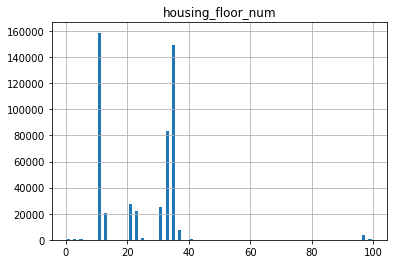

In [12]:
# the distribution of housing_floor_num
df_clean.hist(column = 'housing_floor_num', bins=50,rwidth=0.5, range=[0,100])

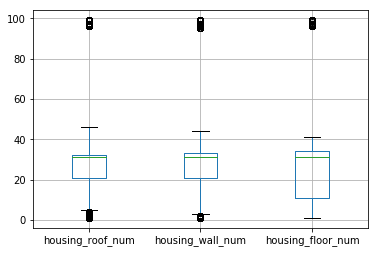

In [13]:
#boxplt of these three variable
df_clean.boxplot(column = ['housing_roof_num', 'housing_wall_num', 'housing_floor_num'])

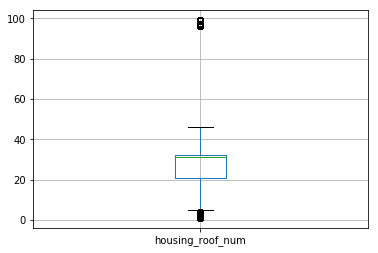

In [14]:
df_clean.boxplot(column = ['housing_roof_num'])

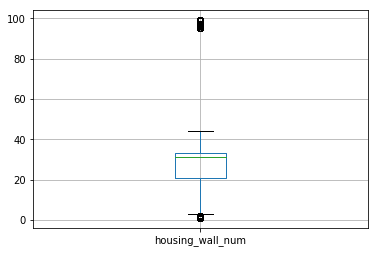

In [15]:
df_clean.boxplot(column = ['housing_wall_num'])

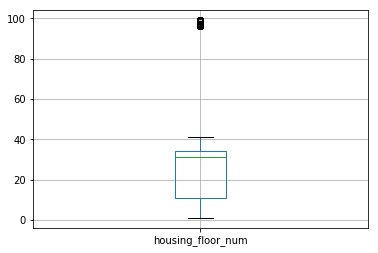

In [16]:
df_clean.boxplot(column = ['housing_floor_num'])

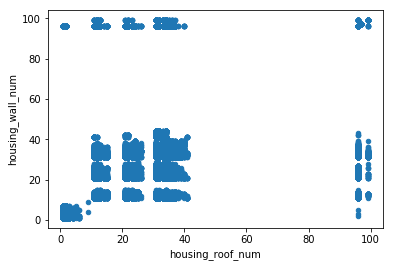

In [18]:
# scatter plot, see how is the relationship between each variable
df1 = df_clean[['housing_roof_num', 'housing_wall_num', 'housing_floor_num']]
ax = df1.plot.scatter(x='housing_roof_num', y = 'housing_wall_num')

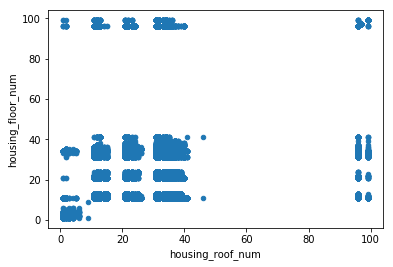

In [19]:
df1.plot.scatter(x = 'housing_roof_num', y  = 'housing_floor_num')

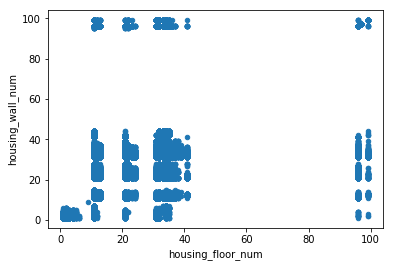

In [20]:
df1.plot.scatter(x = 'housing_floor_num', y  = 'housing_wall_num')